 <img src="https://eant.tech/imagenes/logo.png" width=25% height=80%  >

## <img src="http://icons.iconarchive.com/icons/cornmanthe3rd/plex/256/Other-python-icon.png" width="40"> Ejercicio HR Analytics 🔎👩🏻‍💼👨🏻‍💼



<center>
<img src="https://www.skuadrarh.com/skuadra/wp-content/uploads/2019/06/reclutamiento_AD-895x430.jpg" border="0" width="70%" height="50%">

source image : [link](https://www.skuadrarh.com/skuadra/5-tips-para-reducir-la-alta-rotacion-de-personal/)


</center>


La **rotación de empleados** es un problema costoso para las empresas, ya que el costo real de reemplazar a un empleado a menudo puede ser bastante grande.
Un estudio realizado por el [Center for American Progress](https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf) encontró que las empresas suelen pagar alrededor de una quinta parte del salario de un empleado para reemplazar a ese empleado, y el costo puede aumentar significativamente si los ejecutivos o los empleados mejor pagados deben ser reemplazados.

<br>

---

<br> 

Realizaremos un analisis de los factores que conducen a la deserción de los empleados, este es un conjunto de datos ficticios creado por científicos de datos de **IBM**.
Datos obtenidos: [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

<br>

----


<br>

Las **preguntas** que debemos responder son: 
* 🔎 ¿Cuáles son los indicadores clave para que un empleado abandone la empresa?
* 🔎 ¿Qué estrategias se pueden adoptar en función de los resultados analizados para mejorar la retención de empleados?


<br>

Mas información sobre algunas varibales del dataset: 

<br>

**`Code`** | **`Education`** | **`EnvironmentSatisfaction`** | **`JobInvolvement`** | **`JobSatisfaction`** | **`PerformanceRating`** | **`RelationshipSatisfaction`** | **`WorkLifeBalance`**
--- | --- | --- | --- | ---| ---| ---| ---
1 | Below College | Low | Low | Low | Low | Low | Bad
2 | College | Medium | Medium | Medium| Good | Medium | Good
3 | Bachelor | High | High | High | Excellent | High | Better
4 | Master | Very High | Very High | Very High | Outstanding | Very High | Best
5 | Doctor | --- | --- | ---| ---| ---| ---


<br>


🏷️ 1. Importar los paquetes 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive 
import seaborn as sns
from datetime import datetime

pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.float_format = '{:.2f}'.format

### 1. Aqui empieza la Clase


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df = pd.read_csv("/content/drive/MyDrive/CLASES DAPY/15 - RRHH/DATA/IBM_Employee (1).csv")

In [70]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


🏷️ 3. Guardar un archivo con la consulta realizada en el paso anterior, el archivo debe tener el siguiente formato:
`HRIBM_yyyymmddhhMMSS.csv` donde
> * yyyy: año actual
> * mm: mes actual
> * dd: día actual
> * hh: hora actual
> * MM: minutos actual
> * SS: segundos actual

Por ejemplo `HRIBM_20200801102030.csv`

In [71]:
file='HRIBM_'+datetime.now().strftime("%Y%m%d%H%M%S")+'.csv'
file

'HRIBM_20210908232903.csv'

In [72]:
path='/content/gdrive/My Drive/EANT/DATA ANALYTICS/python/00 - Version/17 - RRHH/'

In [73]:
path_file=path+file

In [74]:
#drive.mount('/content/gdrive')
#df.to_csv(path_file)

🏷️ 4. Imprimir las primeras columnas del dataframe

In [75]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


🏷️ 5. Imprima cantidad de columnas y filas

In [76]:
df.shape

(1470, 35)

🏷️ 6. El dataframe contiene valores nulos?

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

🏷️ 7. En base a la documentación del dataset cuántos empleados abandonaron la compañía.

In [78]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [79]:
df_att=df.groupby('Attrition',as_index=False)['Age'].count().rename({'Age':'qty'},axis=1)
df_att['prop'] = round(df_att['qty']/sum(df_att['qty']),2)
df_att

,Attrition,qty,prop
0,No,1233,0.84
1,Yes,237,0.16


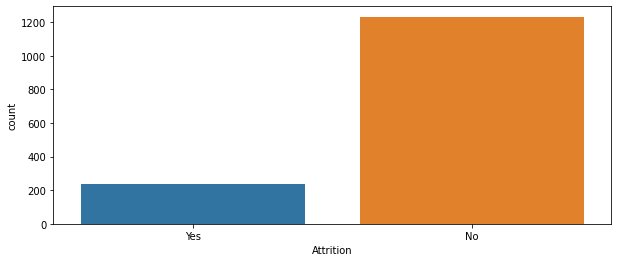

In [80]:
plt.figure(figsize=(10,4))
sns.countplot(x='Attrition',data=df)

🏷️ 8. Cual es en promedio el nivel educativo y la edad de los empleados de esta empresa, realice un análisis teniendo en cuenta los que abandonaron la empresa y los que aún continúan trabajando en la misma.

In [81]:
print('La edad promedio que tienen todos los empleados es: ',int(round(df.Age.mean(),0)),'años')

La edad promedio que tienen todos los empleados es:  37 años


In [82]:
print('La edad promedio que tienen todos los empleados que se fueron de la empresa es: ',
      int(round(df.loc[df.Attrition=='Yes','Age'].mean(),0)),'años')

La edad promedio que tienen todos los empleados que se fueron de la empresa es:  34 años


In [83]:
print('La edad promedio que tienen todos los empleados que aun permanecen de la empresa es: ',
      int(round(df.loc[df.Attrition=='No','Age'].mean(),0)),'años')

La edad promedio que tienen todos los empleados que aun permanecen de la empresa es:  38 años


🏷️ 9. En base a los datos obtenidos en el paso anterior cual de las siguientes expresiones es verdadera:

* [ ] a. La media de edad de los empleados que renunciaron a la empresa son mayores que los que aun permanecen.
* [ ] b. La media de edad de los empleados que renunciaron a la empresa tienen 25 años.
* [x] c. La media de edad de los empleados que renunciaron a la empresa son menores que los que aun permanecen.

🏷️ 10. Realice una gráfica de la edad, separando la misma entre los que son empleados y los que renunciaron.

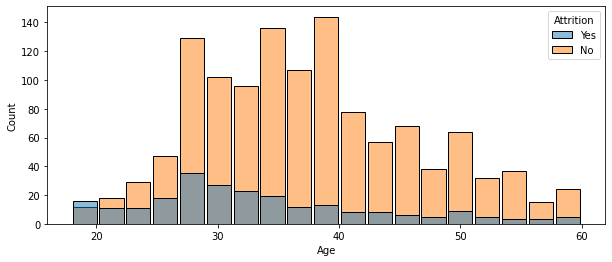

In [84]:
plt.figure(figsize=(10,4))
sns.histplot(x='Age',hue='Attrition',data=df,shrink=0.9)

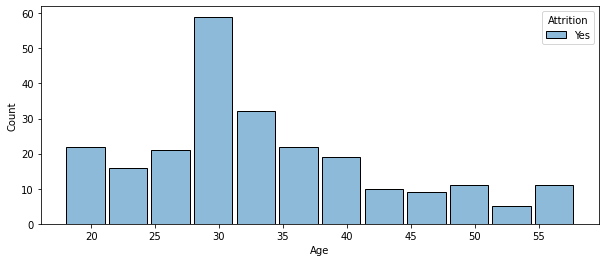

In [85]:
plt.figure(figsize=(10,4))
sns.histplot(x='Age',hue='Attrition',data=df.loc[df.Attrition=='Yes',:],
             shrink=0.9)

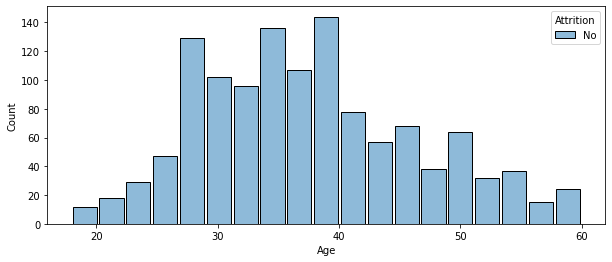

In [86]:
plt.figure(figsize=(10,4))
sns.histplot(x='Age',hue='Attrition',data=df.loc[df.Attrition=='No',:],
             shrink=0.9)

Text(0.5, 1.0, 'Attrition: No')

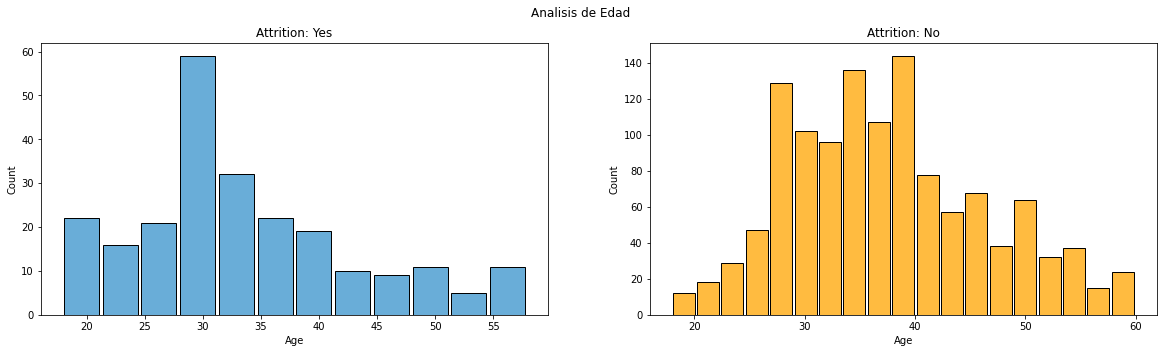

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Analisis de Edad')

# grafico
sns.histplot(ax=axes[0],x='Age',color='#3792cb',data=df.loc[df.Attrition=='Yes',:],shrink=0.9)
axes[0].set_title('Attrition: Yes')

# grafico
sns.histplot(ax=axes[1],x='Age',color='orange',data=df.loc[df.Attrition=='No',:],shrink=0.9)
axes[1].set_title('Attrition: No')


🏷️ 11. Cuales son las áreas o departamento que tienen más rotación de  empleados ?


In [88]:
df.groupby(['Department','Attrition'],as_index=False)['Age'] \
          .count() \
          .rename({'Age':'qty'},axis=1)

,Department,Attrition,qty
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [89]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


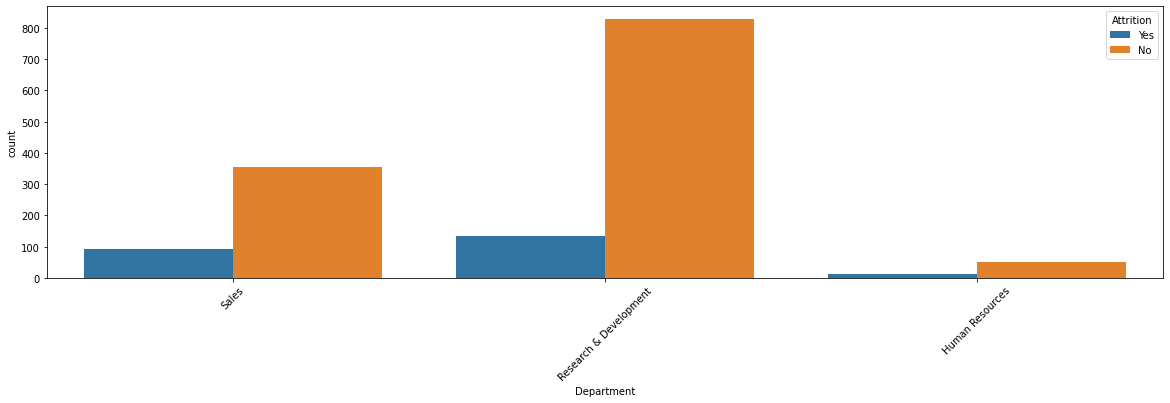

In [90]:
plt.figure(figsize=(20,5))
sns.countplot(data = df,
             x="Department", 
             hue = "Attrition")
plt.xticks(rotation=45)

plt.show()

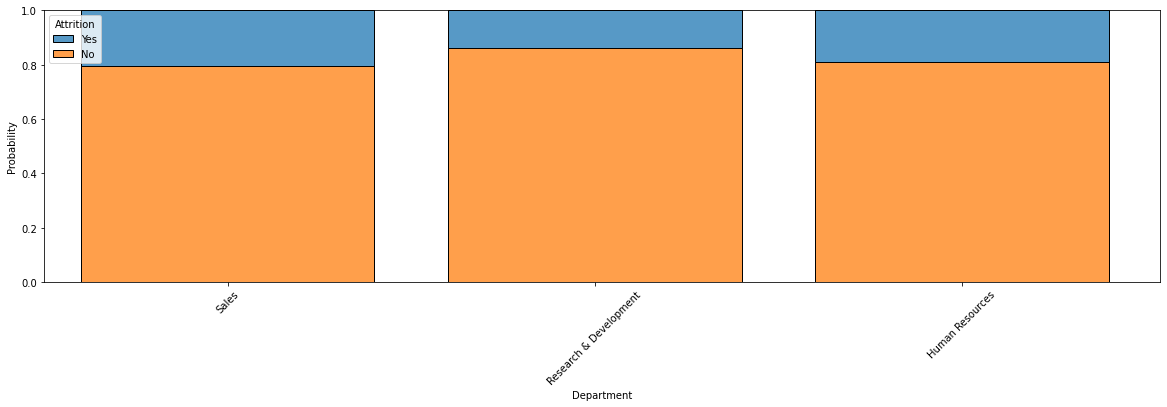

In [91]:
plt.figure(figsize=(20,5))
sns.histplot(df,
             x="Department", 
             hue="Attrition", 
             stat="probability", 
             multiple="fill",
             shrink=.8)
plt.xticks(rotation=45)

plt.show()

In [92]:
df_depto=df.groupby(['Department','Attrition'],as_index=False)['Age'] \
          .count() \
          .rename({'Age':'qty'},axis=1)
df_depto

,Department,Attrition,qty
0,Human Resources,No,51
1,Human Resources,Yes,12
2,Research & Development,No,828
3,Research & Development,Yes,133
4,Sales,No,354
5,Sales,Yes,92


In [93]:
df_depto=pd.crosstab(df_depto.Department,df_depto.Attrition,values=df_depto.qty,aggfunc='sum')
df_depto=df_depto.reset_index()
df_depto["sum"] = df_depto.sum(axis=1)
df_depto['No_'] = df_depto['No']/df_depto["sum"] 
df_depto['Yes_']= df_depto['Yes']/df_depto["sum"] 

In [94]:
df_depto

Attrition,Department,No,Yes,sum,No_,Yes_
0,Human Resources,51,12,63,0.81,0.19
1,Research & Development,828,133,961,0.86,0.14
2,Sales,354,92,446,0.79,0.21


😃 **R Users** si sabes programar en `r`podes utilizar el paquete plotnine que compila el paquete **ggplot2**
A continuación un ejemplo:

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


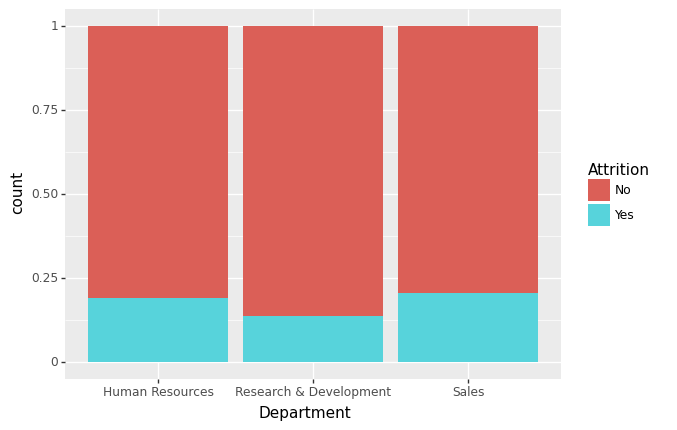

<ggplot: (8737339544729)>

In [95]:
import plotnine
(
    plotnine.ggplot(df,plotnine.aes(x='Department',fill='Attrition'))+ 
    plotnine.geom_bar(position='fill')
)

🏷️ 12. Evalúe la distribución de los sueldos y deserción de los empleados, que conclusión puede obtener?
Asimismo realice un gráfico en el cual se visualice los sueldos que están por debajo del promedio o por arriba del mismo


In [96]:
dfprom=df.MonthlyIncome.mean()
dfprom_yes=df.loc[df.Attrition=='Yes','MonthlyIncome'].mean()
dfprom_no=df.loc[df.Attrition=='No','MonthlyIncome'].mean()

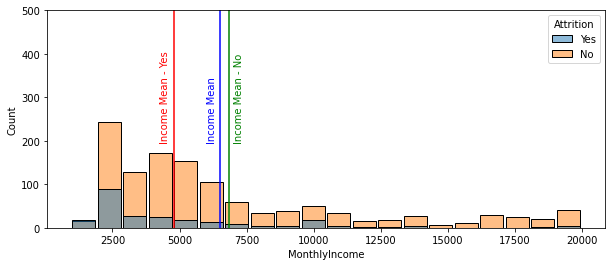

In [97]:


dfprom=df.MonthlyIncome.mean()
dfprom_yes=df.loc[df.Attrition=='Yes','MonthlyIncome'].mean()
dfprom_no=df.loc[df.Attrition=='No','MonthlyIncome'].mean()
plt.figure(figsize=(10,4))
sns.histplot(x='MonthlyIncome',hue='Attrition',data=df,shrink=0.9)
# how to plot median line?
plt.axvline(dfprom,color='blue')
plt.text(dfprom-500,200,'Income Mean',color='blue',rotation=90)
plt.axvline(dfprom_yes,color='red')
plt.text(dfprom_yes-500,200,'Income Mean - Yes',color='red',rotation=90)
plt.axvline(dfprom_no,color='green')
plt.text(dfprom_no+200,200,'Income Mean - No',color='green',rotation=90)
plt.ylim(0,500)


plt.show()

🏷️ 13. La distancia que los empleados tienen para llegar a sus puestos de trabajo, puede ser un factor que genere que los empleados cambien de trabajo.

In [98]:
temp=df.groupby(['DistanceFromHome','Attrition'],as_index=False)['Age'].count().rename({'Age':'qty'},axis=1)

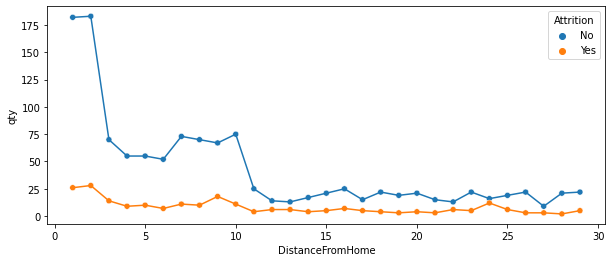

In [99]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='DistanceFromHome',y='qty',hue='Attrition',data=temp)
sns.lineplot(x='DistanceFromHome',y='qty',hue='Attrition',data=temp,legend=False)

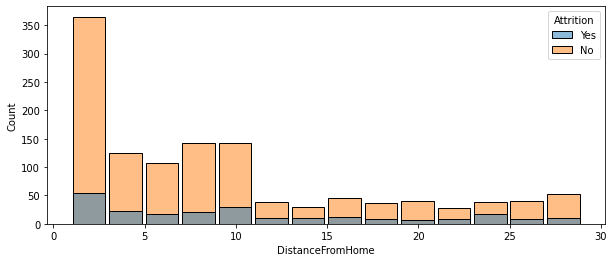

In [100]:
plt.figure(figsize=(10,4))
sns.histplot(x='DistanceFromHome',hue='Attrition',data=df,shrink=0.9)

🏷️ 14. Qué análisis puede realizar sobre la cantidad de años trabajados?

<Figure size 720x288 with 0 Axes>

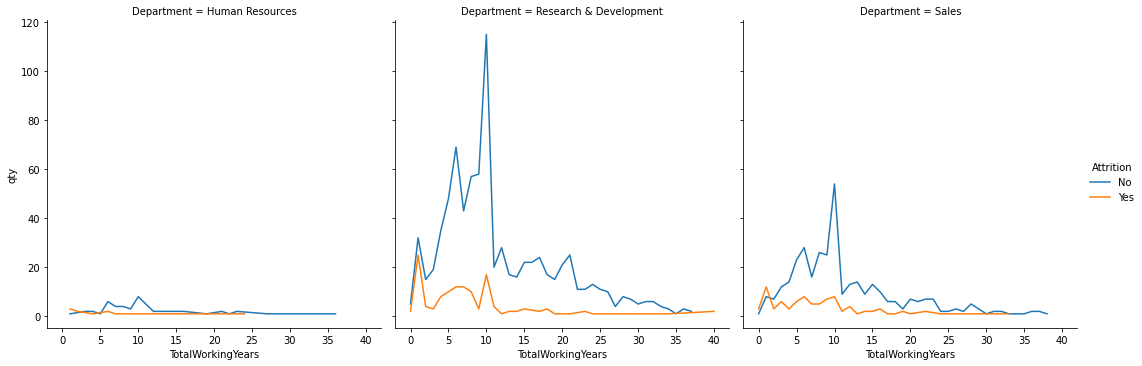

In [101]:
temp=(df
      .groupby(['Department','TotalWorkingYears','Attrition'],as_index=False)['Age']
      .count()
      .rename({'Age':'qty'},axis=1))

plt.figure(figsize=(10,4))
sns.relplot(x='TotalWorkingYears',y='qty',hue='Attrition',data=temp,kind='line',col='Department')

<Figure size 720x288 with 0 Axes>

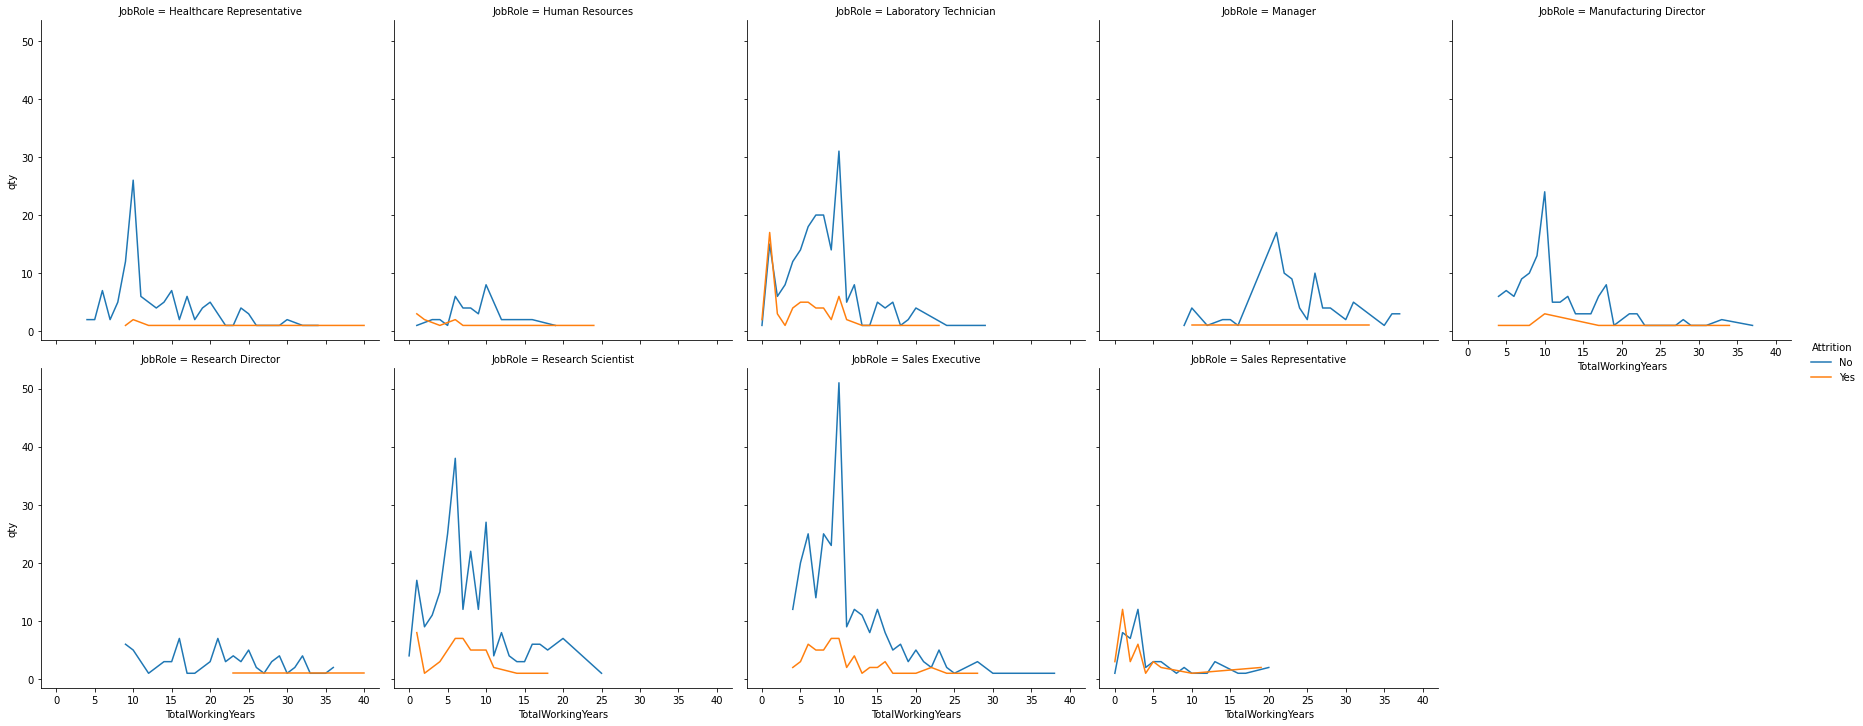

In [102]:
temp=(df
      .groupby(['JobRole','TotalWorkingYears','Attrition'],as_index=False)['Age']
      .count()
      .rename({'Age':'qty'},axis=1))

plt.figure(figsize=(10,4))
sns.relplot(x='TotalWorkingYears',y='qty',hue='Attrition',data=temp,kind='line',col='JobRole',col_wrap=5)

🏷️ 15. Realice un análisis sobre el sueldo mensual en base a la experiencia que posee el empleado, realizando alguna diferenciación entre los empleados activos y los que ya no trabajan en la empresa.

<Figure size 1080x288 with 0 Axes>

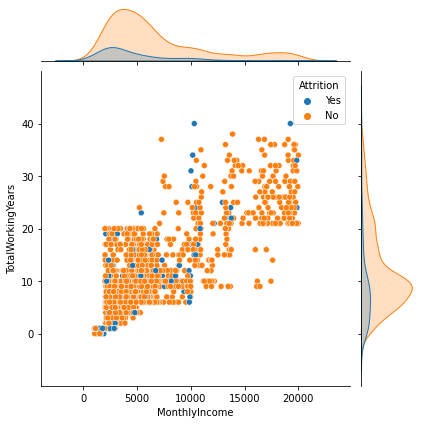

In [103]:
plt.figure(figsize=(15,4))
sns.jointplot(x="MonthlyIncome", y="TotalWorkingYears",hue='Attrition', data=df)

🏷️ 16. Se afirma que las personas menores a 25 años y solteros son los que más rotación tienen, puede validar esta afirmaciòn y asimismo puede brindar algún dato adicional sobre cual es el departamento que más rotación tiene para este rango de edad y estado civil.

In [104]:
df['Age_25_Single']=np.where((df.Age<=25)&(df.MaritalStatus=='Single'),1,0)

<Figure size 1080x288 with 0 Axes>

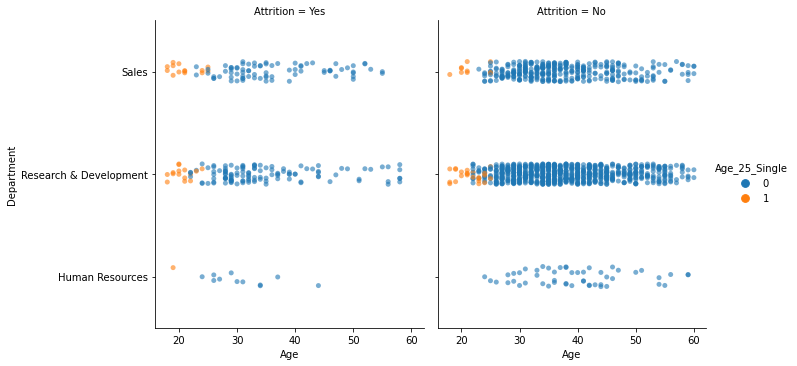

In [105]:
plt.figure(figsize=(15,4))
sns.catplot(y='Department',x= 'Age', jitter=True, hue='Age_25_Single',data=df,alpha=0.6,
            kind='strip',col='Attrition')


<Figure size 1080x288 with 0 Axes>

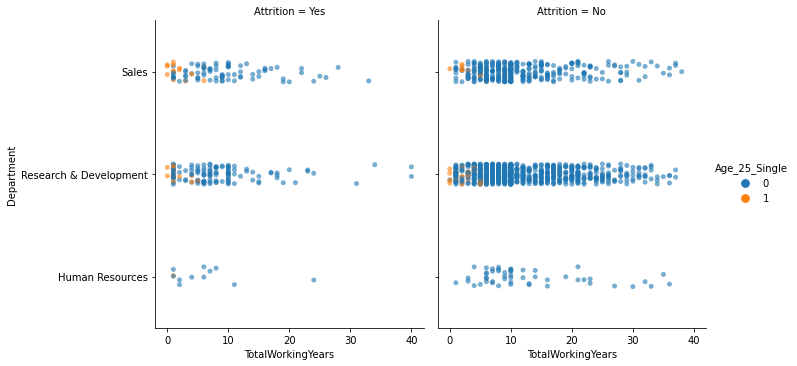

In [106]:
plt.figure(figsize=(15,4))
sns.catplot(y='Department',x= 'TotalWorkingYears', jitter=True,hue='Age_25_Single',data=df,alpha=0.6,
            kind='strip',col='Attrition')

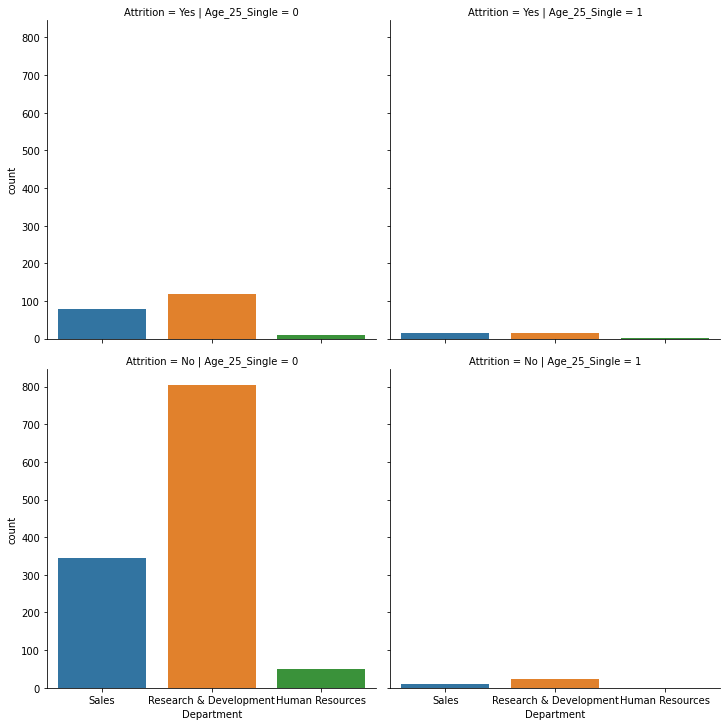

In [107]:
sns.catplot(x='Department',
            kind='count',
            col='Age_25_Single',
            data=df,
            row='Attrition',
            dodge=False)

🏷️ 17. Cuales son las variables categoricas que seleccionaria para realizar un analisis de este dataset.
Que conclusiones obtuvo?

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [109]:
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [110]:
col=["Attrition" ,"Age" ,"DailyRate","HourlyRate","EmployeeNumber","EmployeeCount",
                          "MonthlyIncome" ,"MonthlyRate" ,"Over18" ,"OverTime" ,"StandardHours" ]

In [111]:
dis= df.columns[~df.columns.isin(col) ]
dis

Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Age_25_Single'],
      dtype='object')